# How to understand how an image is represented as a 3D array.  
First import CV2 (Computer Vision 2), Numpy and Matplotlib

In [57]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Create a 4x2 'grid' of pixels, defining the Blue, Green, Red values for each pixel (this is an array with 3 dimensions).   
Note, we define blue first, BGR order not RGB.  

Here I'm writing it out here as two lines of 4 pixels as the image will be displayed, but that's not how python will print out the array, as seen in a moment.  

In [58]:
img = np.array([
    [[  0,   0,   0], [255,   0,   0], [  0, 255,   0], [  0,   0, 255]],
    [[128,   0,   128], [  0,   128, 128], [128, 128,   0], [255, 255, 255]]
    ]).astype(np.uint8)

Show the shape of the array (think of the output as how many rows, columns and colour channels).

In [59]:
np.shape(img)

(2, 4, 3)

The pixels values are 8 bit integers (0 to 255), we defined the type as uint8 at the end of the array.  
  
Because there are 3 colours each with 256 possible intensities, each pixel has a 256^3 possible colours. You may have heard of things having "16 million colours", this is where that number comes from.

The next cell demonstrates how python shows the array. The Blue, Green, Red values of the 4 pixels on the first row of the "image", then the 4 of the second row. You can have a guess at what the final image will look like based off this array.

In [60]:
img

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0, 255]],

       [[128,   0, 128],
        [  0, 128, 128],
        [128, 128,   0],
        [255, 255, 255]]], dtype=uint8)

Let's have a look at the image we've defined! 

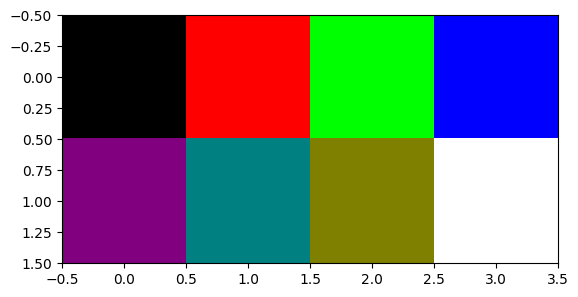

In [61]:
plt.imshow(img)

Having colour values represented in 8bit integers is good if you're a computer, but since we're humans looking to understand how images can be manipulated, we can normalise the values so they range from 0 to 1 instead of 0 to 255.  

First we convert the array to a float and then divide each value by 255.
This is called normalising.

In [99]:
normimg = img.astype(np.float32)
normimg /= 255.

normimg

array([[[0.       , 0.       , 0.       ],
        [1.       , 0.       , 0.       ],
        [0.       , 1.       , 0.       ],
        [0.       , 0.       , 1.       ]],

       [[0.5019608, 0.       , 0.5019608],
        [0.       , 0.5019608, 0.5019608],
        [0.5019608, 0.5019608, 0.       ],
        [1.       , 1.       , 1.       ]]], dtype=float32)

The image still displays exactly the same:

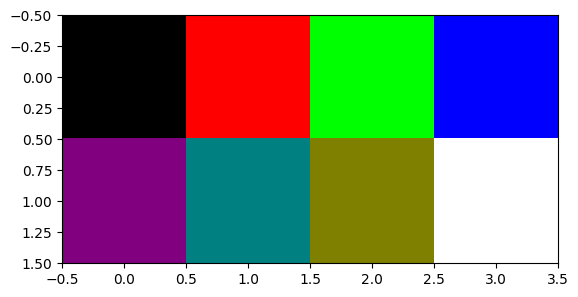

In [100]:
plt.imshow(normimg)


We can use several methods to do this calculation, which result in having 1 value in the third dimension of the array. I think it's best to focus on whichever makes the most sense out of the 1st and 2nd approaches, but if neither make sense just trust that the function in approach 3 does what's needed!  

1. We can create a 2D array that is the size of the image (we no longer need the 3rd dimension for the different colours) and use a loop to iterate through each 'pixel' in the array. For each pixel, eachcolour is weighted and suming the sum of the 3 is used to create the grayscale value for that pixel.  

2. We can use linear algebra to find the dot product of the 3D array (source image) and the 1D array (the B,G,R weights), which will be the sum product over the last axis of the 3D array. The function np.dot()  

3. We use Open-CVs built in function cvtColour to convert the colour spaces. We're going from BGR to greyscale. There are other colour spaces possible too, e.g. HSV, but they won't be demonstated here.  


In [104]:
H,W = normimg.shape[:2]
gray_loop = np.zeros((H,W), np.float32)

for i in range(H):
    for j in range(W):
        gray_loop[i,j] = np.clip(0.07 * normimg[i,j,0]  + 0.72 * normimg[i,j,1] + 0.21 * normimg[i,j,2], 0, 1)

gray_loop

array([[0.        , 0.07      , 0.72      , 0.21      ],
       [0.14054903, 0.46682355, 0.39654905, 1.        ]], dtype=float32)

In [106]:
# Option 2

# Duplicate the source image 
gray_calc = normimg

gray_calc = np.clip(np.dot(normimg[...,:3], [0.144, 0.587, 0.299]).astype(np.float32), 0, 1)
# Try commenting out the line above and using the one below that doesn't clip the output between 0 and 1. See how we can have values > 1?
# Matplot will auto detect and clip image values between 0-1 for Floats and 0-255 for Ints, but we should be doing this ourselves.
#gray_calc = np.dot(normimg[...,:3], [0.144, 0.587, 0.299]).astype(np.float32)

gray_calc

array([[0.        , 0.144     , 0.587     , 0.299     ],
       [0.22236864, 0.4447373 , 0.36693335, 1.        ]], dtype=float32)

In [107]:
# Option 3

gray_img = cv.cvtColor(normimg, cv.COLOR_BGR2GRAY)

gray_img

array([[0.        , 0.114     , 0.587     , 0.299     ],
       [0.20730981, 0.4447373 , 0.35187453, 1.        ]], dtype=float32)

Here we make a 2x2 grid of subplots to display our normalised colour image, and each of the normalised grayscale conversions.  

I also added a line to remove the tick marks on the plot.

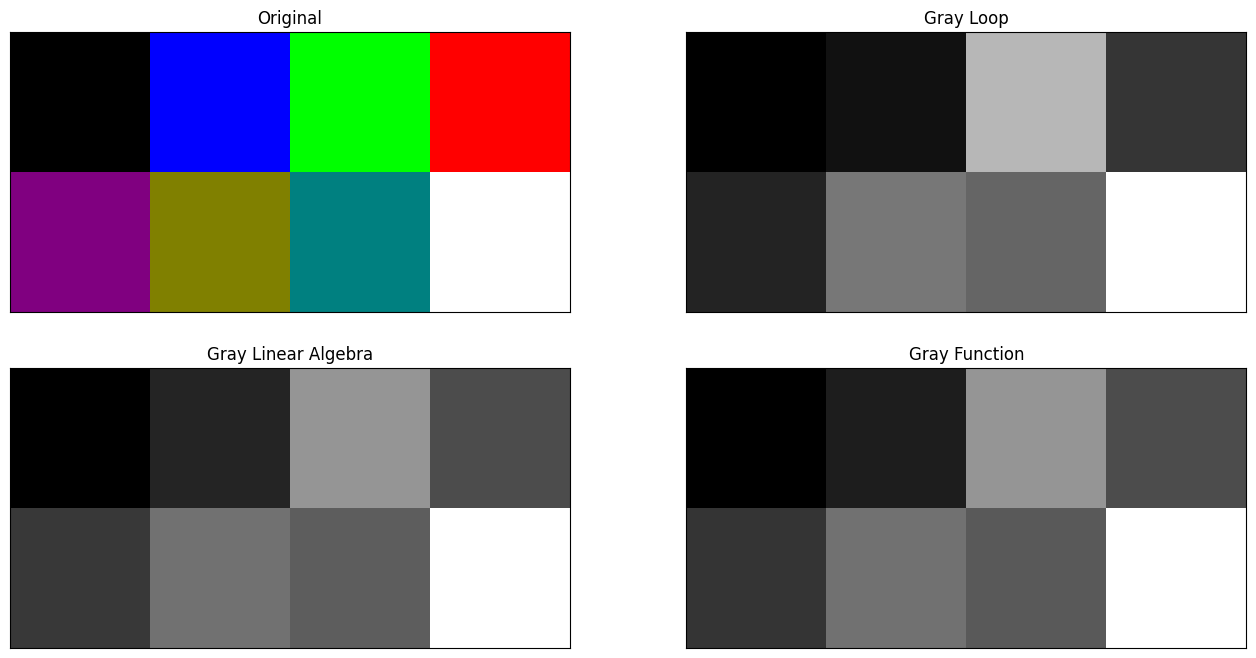

In [116]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))


ax[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0, 0].set_title("Original")

ax[0, 1].imshow(cv.cvtColor(gray_loop, cv.COLOR_BGR2RGB))
ax[0, 1].set_title("Gray Loop")

ax[1, 0].imshow(cv.cvtColor(gray_calc, cv.COLOR_BGR2RGB))
ax[1, 0].set_title("Gray Linear Algebra")

ax[1, 1].imshow(cv.cvtColor(gray_img, cv.COLOR_BGR2RGB))
ax[1, 1].set_title("Gray Function")


plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

plt.show()
